In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem statement.

Build a recommender system by using cosine simillarties score.

In [2]:
data=pd.read_csv('book.csv')
data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [3]:
data=data.iloc[:,1:4]
data

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
data[data.duplicated()]

,User.ID,Book.Title,Book.Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [7]:
data.drop_duplicates(inplace=True)
data.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [8]:
data.reset_index(drop=True,inplace=True)
data

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9993,162121,American Fried: Adventures of a Happy Eater.,7
9994,162121,Cannibal In Manhattan,9
9995,162121,How to Flirt: A Practical Guide,7
9996,162121,Twilight,8


In [9]:
data.shape

(9998, 3)

In [10]:
data.rename(columns={'User.ID':'Userid','Book.Title':'Book_title','Book.Rating':'Rating'}, inplace=True)
data

,Userid,Book_title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9993,162121,American Fried: Adventures of a Happy Eater.,7
9994,162121,Cannibal In Manhattan,9
9995,162121,How to Flirt: A Practical Guide,7
9996,162121,Twilight,8


In [11]:
data.isnull()

,Userid,Book_title,Rating
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9993,False,False,False
9994,False,False,False
9995,False,False,False
9996,False,False,False


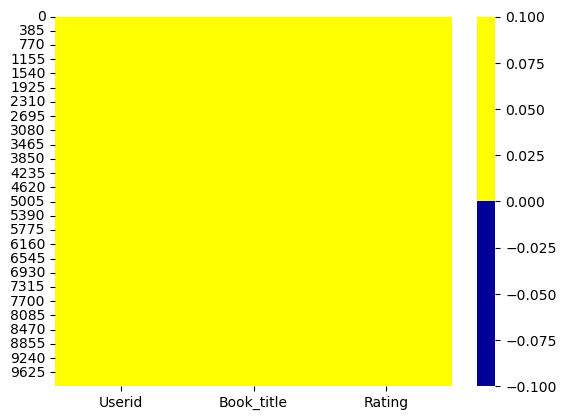

In [12]:
colours = ['#000099', '#ffff00']
pal = sns.color_palette(colours)
sns.heatmap(data.isnull(), cmap=pal)
plt.show()

In [13]:
data.corr()

C:\Users\sreen\AppData\Local\Temp\ipykernel_11872\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Userid,Rating
Userid,1.000000,-0.041574
Rating,-0.041574,1.000000


C:\Users\sreen\AppData\Local\Temp\ipykernel_11872\4211818844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap=pal)


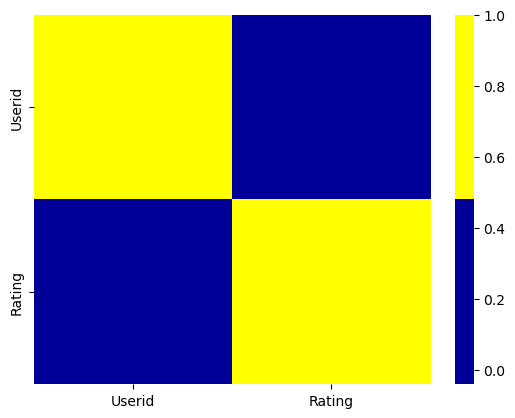

In [14]:
sns.heatmap(data.corr(), cmap=pal)
plt.show()

C:\Users\sreen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sreen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sreen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\sreen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


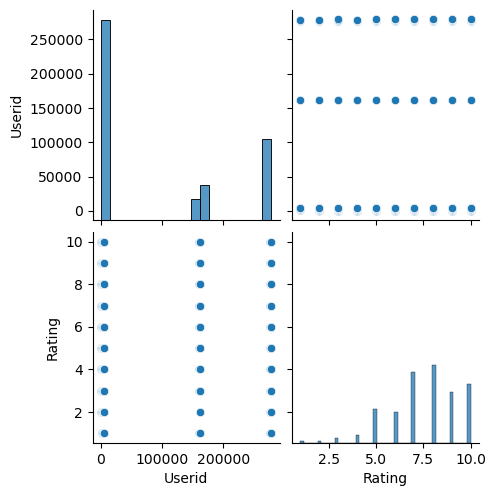

In [15]:
sns.pairplot(data=data,palette='Set1')
plt.show()

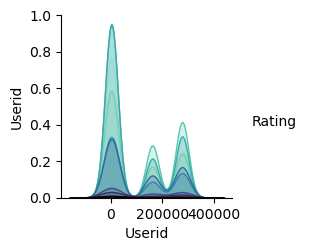

In [16]:
sns.pairplot(data=data,palette='mako',hue='Rating')
plt.show()

In [17]:
data.describe()

,Userid,Rating
count,9998.000000,9998.000000
mean,95339.726845,7.566413
std,117650.215490,1.821685
min,8.000000,1.000000
25%,2103.000000,7.000000
50%,3757.000000,8.000000
75%,162052.000000,9.000000
max,278854.000000,10.000000


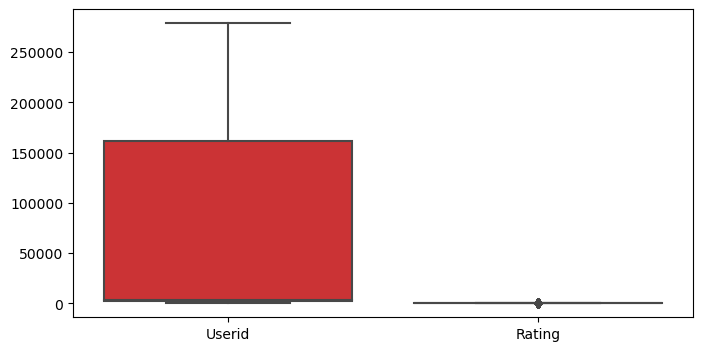

In [18]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = data,palette='Set1')
plt.show()

#### List of Unique Book

In [19]:
data['Book_title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [20]:
len(data['Book_title'].unique())

9659

#### List of Unique Userid

In [21]:
len(data['Userid'].unique())

2182

#### Book having the highest rating

In [22]:
bookl=data.groupby('Book_title').agg('mean')['Rating']

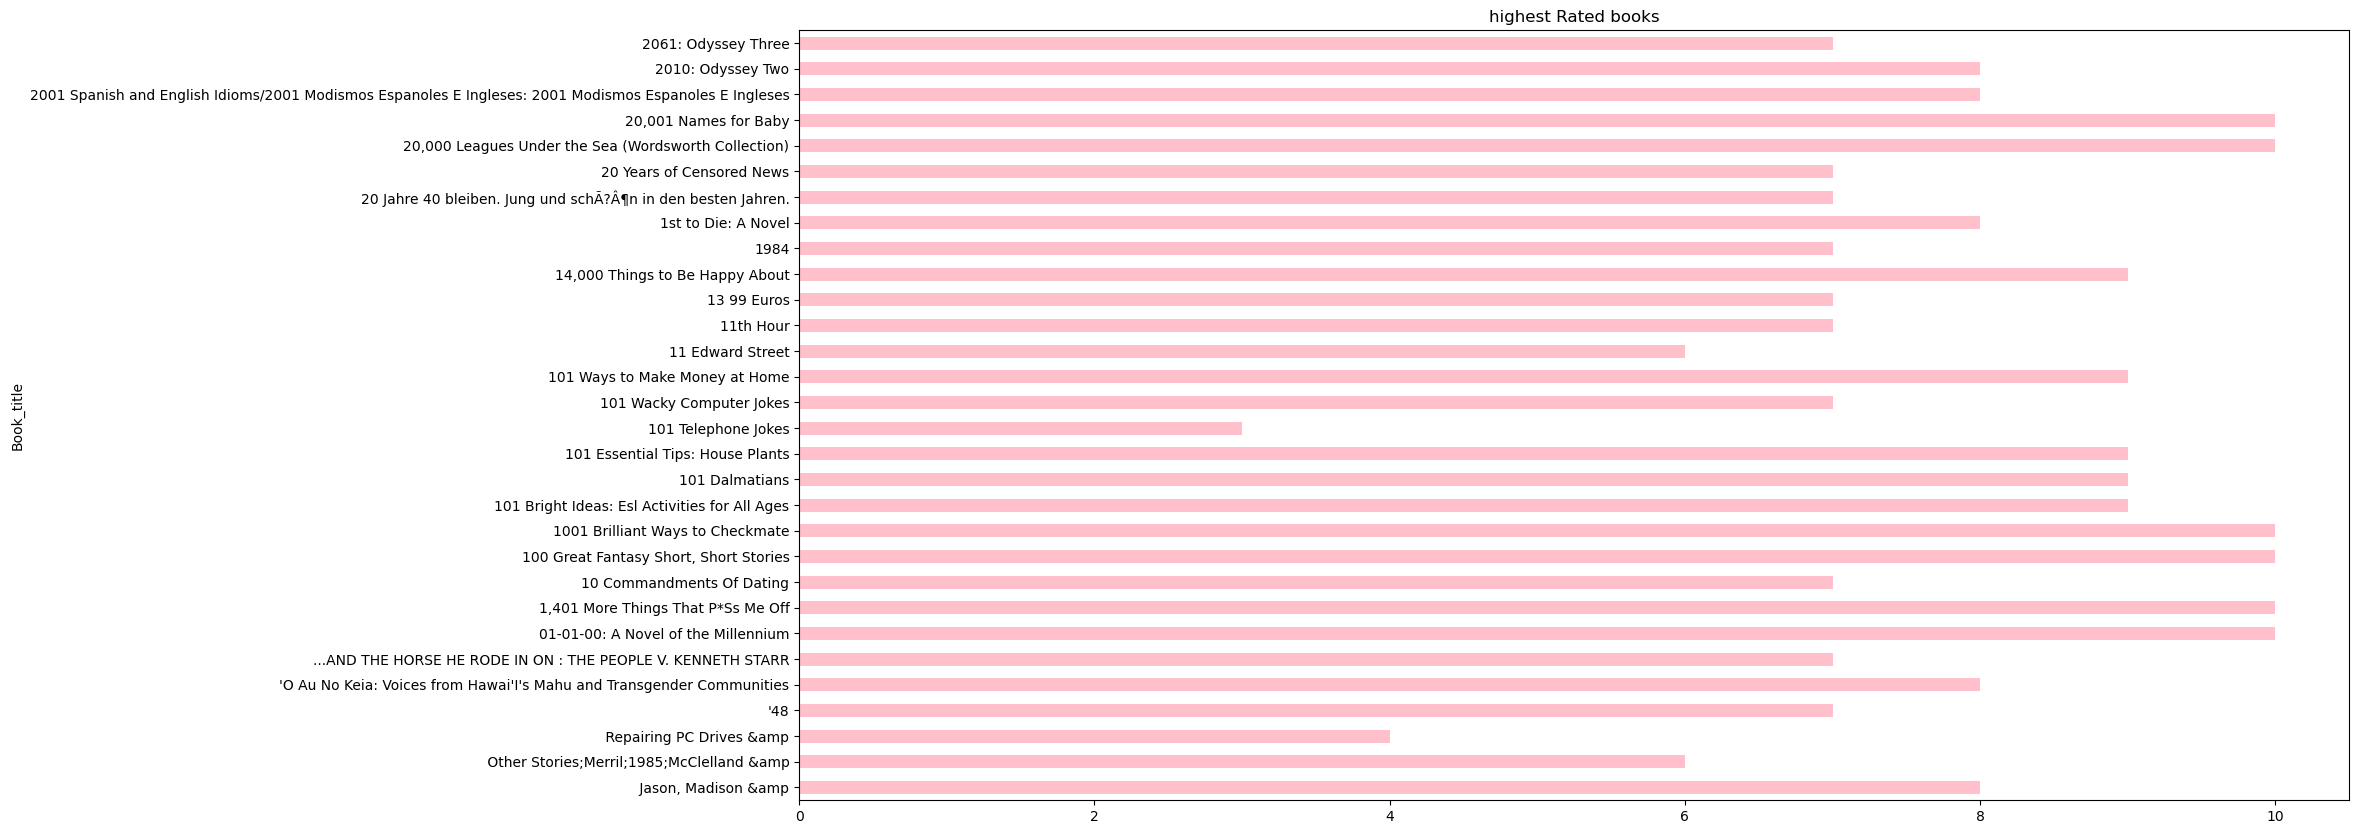

In [23]:
bookl.head(30).plot(kind='barh',figsize=(20,10),color='pink',alpha=1,title="highest Rated books")
plt.show() #First 100 numbers

In [24]:
bookl1=data.groupby('Book_title').agg('mean')['Rating'].sort_values(ascending=False)

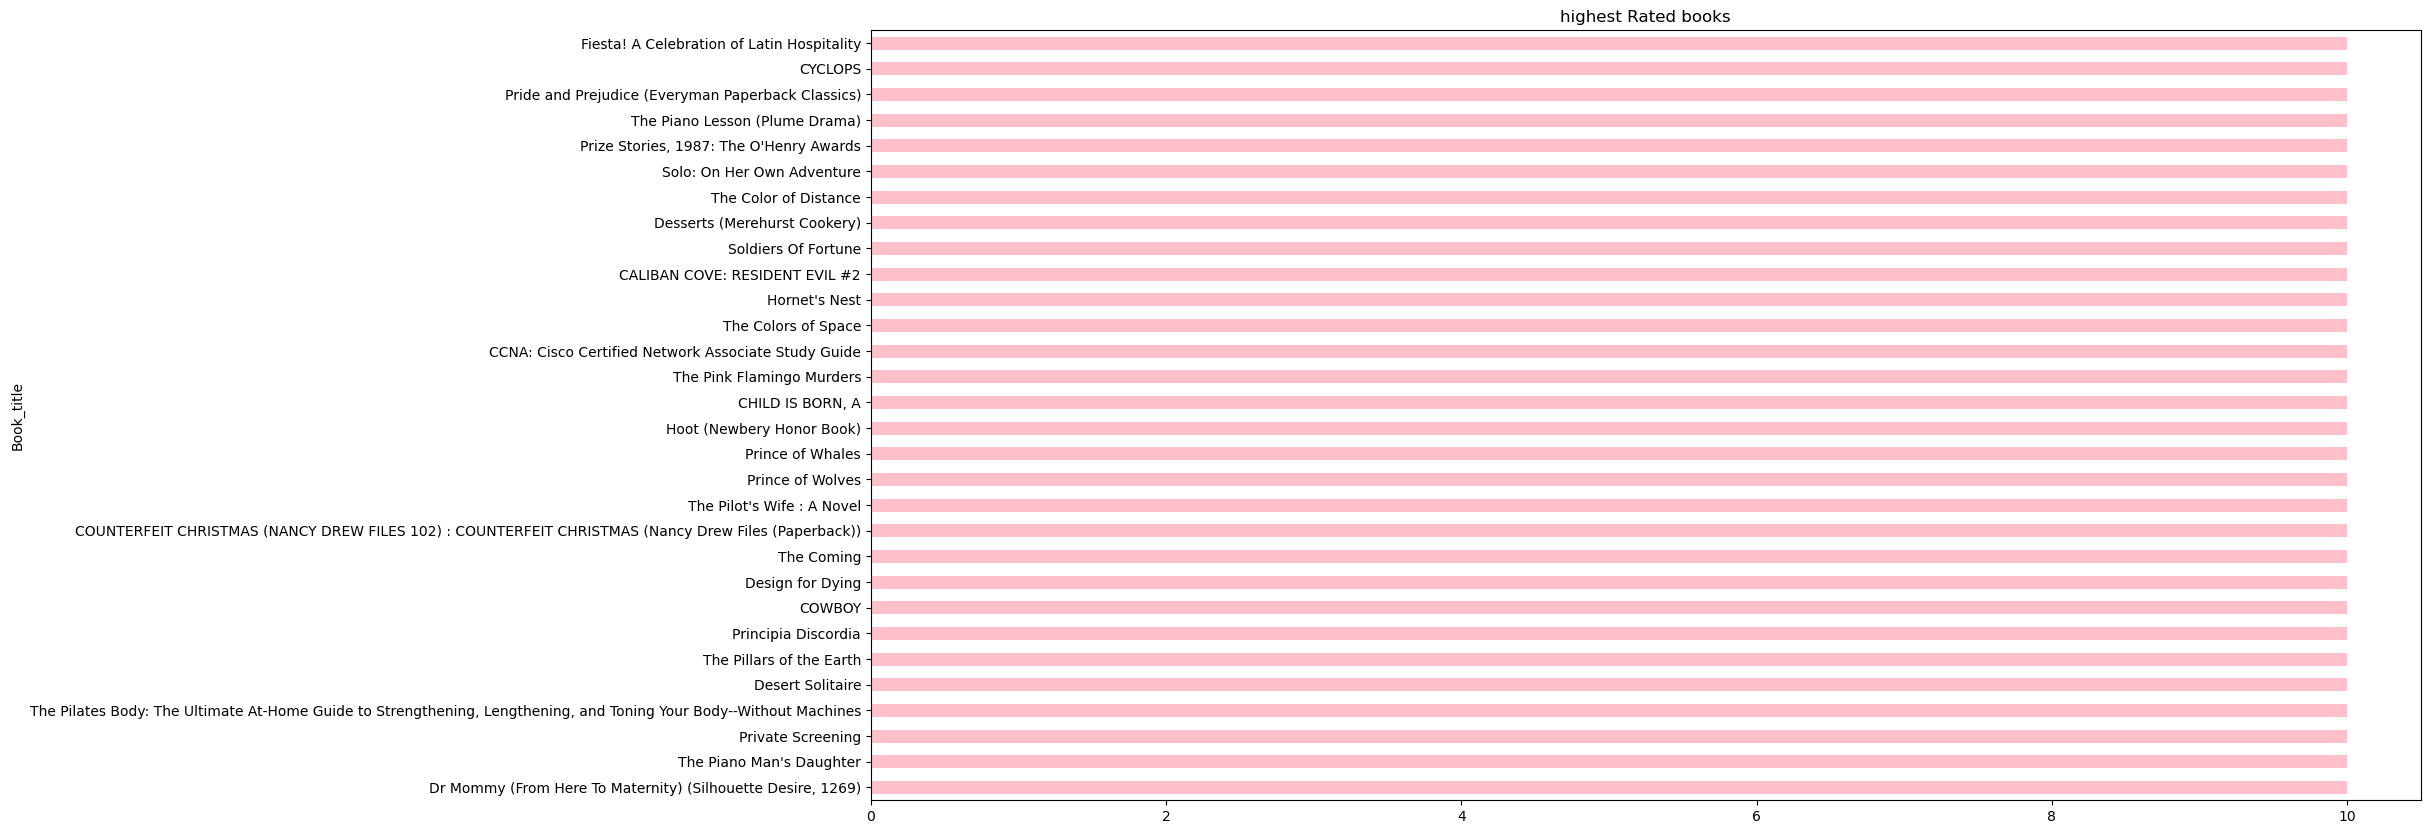

In [25]:
bookl1.head(30).plot(kind='barh',figsize=(20,10),color='pink',alpha=1,title="highest Rated books")
plt.show() #took top 100 numbers samples

#### Most read books

In [26]:
bookr=data.groupby('Book_title').agg('count')['Rating'].sort_values(ascending=True)
bookr1=bookr.head(30)

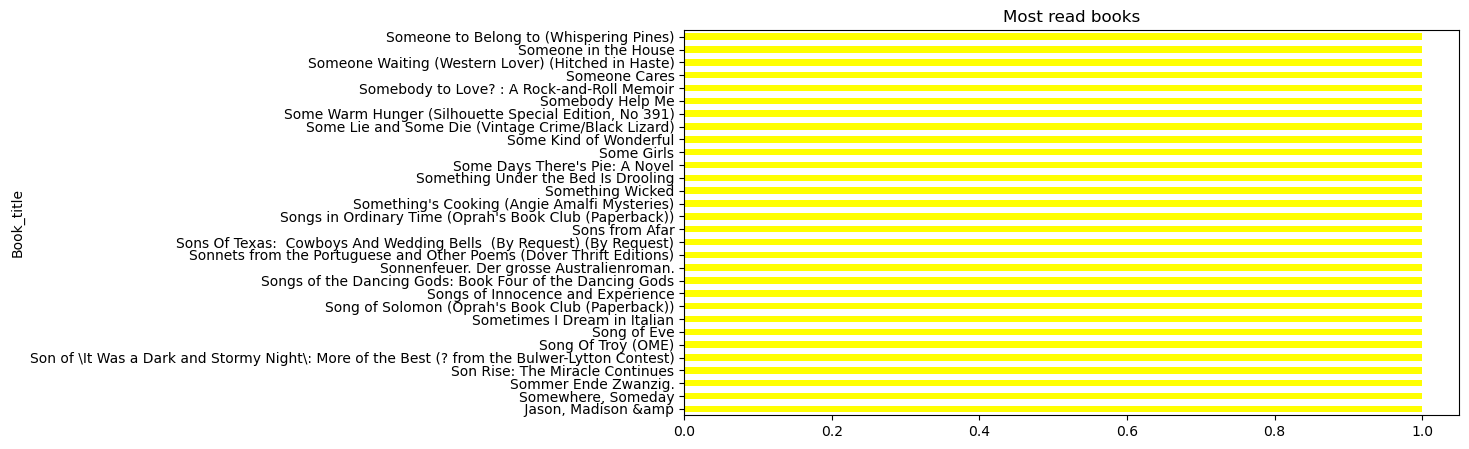

In [27]:
bookr1.plot(kind='barh',figsize=(10,5),color='yellow',alpha=1,title="Most read books")
plt.show()

In [28]:
rating_count = data['Rating'].value_counts()
rating_count

8     2283
7     2074
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

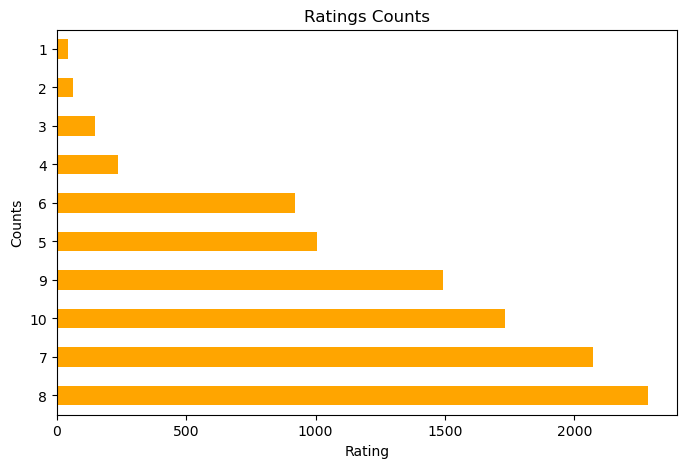

In [29]:
rating_count.plot(kind = 'barh', color='orange', alpha=1,title='Ratings Counts', figsize=(8,5), xlabel='Rating', ylabel='Counts')
plt.show()

In [30]:
user_book_matrix=pd.pivot_table(data=data,columns='Book_title',index='Userid',values='Rating')
user_book_matrix

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
Userid,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [31]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with your chosen strategy (e.g., 'mean')
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the DataFrame
user_book_matrix_filled = pd.DataFrame(imputer.fit_transform(user_book_matrix), columns=user_book_matrix.columns, index=user_book_matrix.index)

In [32]:
user_book_matrix_filled

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
Userid,,,,,,,,,,,,,,,,,,,,,
8,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0
9,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0
10,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0
12,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0
14,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0
278849,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0
278851,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
user_sim_mat=cosine_similarity(user_book_matrix_filled)
user_sim_mat

array([[1.        , 1.        , 1.        , ..., 0.99999915, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99999915, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99999915, 1.        ,
        1.        ],
       ...,
       [0.99999915, 0.99999915, 0.99999915, ..., 1.        , 0.99999915,
        0.99999915],
       [1.        , 1.        , 1.        , ..., 0.99999915, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99999915, 1.        ,
        1.        ]])

In [35]:
np.fill_diagonal(user_sim_mat,0)
user_sim_mat

array([[0.        , 1.        , 1.        , ..., 0.99999915, 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.99999915, 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 0.99999915, 1.        ,
        1.        ],
       ...,
       [0.99999915, 0.99999915, 0.99999915, ..., 0.        , 0.99999915,
        0.99999915],
       [1.        , 1.        , 1.        , ..., 0.99999915, 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99999915, 1.        ,
        0.        ]])

In [36]:
user_sim_df=pd.DataFrame(user_sim_mat,columns=data['Userid'].unique(),index=data['Userid'].unique())
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999998,0.999999,1.000000,1.000000,0.999999,1.000000,1.000000
276729,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999998,0.999999,1.000000,1.000000,0.999999,1.000000,1.000000
276736,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999998,0.999999,1.000000,1.000000,0.999999,1.000000,1.000000
276737,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999998,0.999999,1.000000,1.000000,0.999999,1.000000,1.000000
276744,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999998,0.999999,1.000000,1.000000,0.999999,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999998,0.999999,0.000000,1.000000,0.999999,1.000000,1.000000
162109,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999998,0.999999,1.000000,0.000000,0.999999,1.000000,1.000000
162113,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,...,0.999999,0.999999,0.999999,0.999997,0.999998,0.999999,0.999999,0.000000,0.999999,0.999999
162121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999998,0.999999,1.000000,1.000000,0.999999,0.000000,1.000000


#### Make recommendation for a random Userid 

In [37]:
Userid=162129

In [38]:
user_sim_df.loc[Userid]

276726    1.000000
276729    1.000000
276736    1.000000
276737    1.000000
276744    1.000000
            ...   
162107    1.000000
162109    1.000000
162113    0.999999
162121    1.000000
162129    0.000000
Name: 162129, Length: 2182, dtype: float64

10 Users similar to Userid=162121

In [39]:
sim_users = user_sim_df.loc[Userid].sort_values(ascending=False)[:3]
sim_users

276726    1.0
2632      1.0
2670      1.0
Name: 162129, dtype: float64

In [40]:
sim_users.index

Int64Index([276726, 2632, 2670], dtype='int64')

In [41]:
sim_user_ratings = user_book_matrix_filled.loc[sim_users.index]
sim_user_ratings

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0
2632,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0
2670,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0


In [42]:
user_book_matrix_filled.loc[sim_users.index].values

array([[8., 6., 4., ..., 7., 5., 4.],
       [8., 6., 4., ..., 7., 5., 4.],
       [8., 6., 4., ..., 7., 5., 4.]])

In [43]:
user_book_matrix_filled.loc[sim_users.index].values.argsort()

array([[6680, 5977, 3154, ..., 1782, 6573, 1448],
       [6680, 5977, 3154, ..., 1782, 6573, 1448],
       [6680, 5977, 3154, ..., 1782, 6573, 1448]], dtype=int64)

In [44]:
ordered_ratings = user_book_matrix_filled.loc[sim_users.index].values.argsort()[:,-1]
ordered_ratings

array([1448, 1448, 1448], dtype=int64)

In [45]:
sim_user_ratings.columns[ordered_ratings].unique()

Index(['Clear Light of Day'], dtype='object', name='Book_title')

Filling with 0 for NaN for same value

In [46]:
user_book_matrix.fillna(0,inplace=True)
user_book_matrix

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
Userid,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [47]:
user_sim_mat1=cosine_similarity(user_book_matrix)
user_sim_mat1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [48]:
np.fill_diagonal(user_sim_mat1,0)
user_sim_mat1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
user_sim_df1=pd.DataFrame(user_sim_mat1,columns=data['Userid'].unique(),index=data['Userid'].unique())
user_sim_df1

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Make recommendation for a random Userid

In [50]:
Userid=162129

In [51]:
user_sim_df1.loc[Userid]

276726    0.0
276729    0.0
276736    0.0
276737    0.0
276744    0.0
         ... 
162107    0.0
162109    0.0
162113    0.0
162121    0.0
162129    0.0
Name: 162129, Length: 2182, dtype: float64

In [52]:
sim_users1 = user_sim_df1.loc[Userid].sort_values(ascending=False)[:3]
sim_users1

276726    0.0
3003      0.0
2983      0.0
Name: 162129, dtype: float64

In [53]:
sim_users1.index

Int64Index([276726, 3003, 2983], dtype='int64')

In [54]:
sim_user_ratings1 = user_book_matrix.loc[sim_users1.index]
sim_user_ratings1

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
user_book_matrix.loc[sim_users1.index].values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
user_book_matrix.loc[sim_users.index].values.argsort()

array([[   0, 6435, 6436, ..., 3223, 9658, 1443],
       [   0, 6435, 6436, ..., 9658, 2523,   49],
       [   0, 6435, 6436, ..., 3216, 9658, 5863]], dtype=int64)

In [57]:
ordered_ratings1 = user_book_matrix.loc[sim_users1.index].values.argsort()[:,-1]
ordered_ratings1

array([1443, 8346,  180], dtype=int64)

In [58]:
sim_user_ratings1.columns

Index([' Jason, Madison &amp', ' Other Stories;Merril;1985;McClelland &amp',
       ' Repairing PC Drives &amp', ''48',
       ''O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities',
       '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
       '01-01-00: A Novel of the Millennium',
       '1,401 More Things That P*Ss Me Off', '10 Commandments Of Dating',
       '100 Great Fantasy Short, Short Stories',
       ...
       'Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)',
       '\Even Monkeys Fall from Trees\ and Other Japanese Proverbs',
       '\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment',
       '\More More More,\ Said the Baby', '\O\ Is for Outlaw',
       '\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character',
       '\Well, there's your problem\: Cartoons', 'iI Paradiso Degli Orchi',
       'stardust', 'Ã?Â?bermorgen.'],
      dtype='object', name='Book_title', length=9659)

In [59]:
sim_user_ratings1.columns[ordered_ratings1]

Index(['Classical Mythology', 'The Seventh Night', 'A Man of Steel'], dtype='object', name='Book_title')

# Item Similarity

In [64]:
book_sim_matrix=user_book_matrix.T
book_sim_matrix

Userid,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book_title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [65]:
book_sim_mat=cosine_similarity(book_sim_matrix)
book_sim_mat

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [66]:
np.fill_diagonal(book_sim_mat,0)
book_sim_mat

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
book_sim_df=pd.DataFrame(book_sim_mat,columns=data['Book_title'].unique(),index=data['Book_title'].unique())
book_sim_df

,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi,The Kitchen God's Wife,What If?: The World's Foremost Military Historians Imagine What Might Have Been,PLEADING GUILTY,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,Where You'll Find Me: And Other Stories,...,The Cloister Walk,Open Water,The Evolution of Jane,AT PARADISE GATE,I Should Have Stayed Home: The Worst Trips of the Great Writers (Travel Literature Series),American Fried: Adventures of a Happy Eater.,Cannibal In Manhattan,How to Flirt: A Practical Guide,Twilight,Kids Say the Darndest Things
Classical Mythology,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clara Callan,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Decision in Normandy,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Mummies of Urumchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
American Fried: Adventures of a Happy Eater.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cannibal In Manhattan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
How to Flirt: A Practical Guide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Twilight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Find the userid's that find intrest for How to Flirt: A Practical Guide

In [68]:
Book_title=8

In [69]:
book_sim_users=book_sim_df.iloc[Book_title].sort_values(ascending=False)[:3]
book_sim_users

Island of the Innocent (Cheney Duval, M.D., 7)    1.0
Jews, God, and History                            1.0
The Return Journey                                1.0
Name: Under the Black Flag: The Romance and the Reality of Life Among the Pirates, dtype: float64

In [70]:
book_sim_users.index

Index(['Island of the Innocent (Cheney Duval, M.D., 7)',
       'Jews, God, and History', 'The Return Journey'],
      dtype='object')

Get the similar users fot the books

In [71]:
book_sim_readers=book_sim_matrix.loc[book_sim_users.index]

In [72]:
book_sim_readers.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
book_sim_readers.values.argsort()

array([[   0, 1463, 1462, ...,  724, 2181, 1025],
       [   0, 1463, 1462, ...,  725, 2181, 1031],
       [   0, 1462, 1461, ...,  724, 2181, 1519]], dtype=int64)

In [74]:
ordered_ratings3=book_sim_matrix.loc[book_sim_users.index].values.argsort()[:,-1]
ordered_ratings3

array([1025, 1031, 1519], dtype=int64)

In [75]:
book_sim_readers.columns

Int64Index([     8,      9,     10,     12,     14,     16,     17,     19,
                22,     26,
            ...
            278831, 278832, 278836, 278843, 278844, 278846, 278849, 278851,
            278852, 278854],
           dtype='int64', name='Userid', length=2182)

In [76]:
book_sim_readers.columns[ordered_ratings3]

Int64Index([3719, 3757, 161974], dtype='int64', name='Userid')